<a href="https://colab.research.google.com/github/Foco22/AFPs/blob/master/AnalisisAFPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bs4

In [3]:
!pip install requests

In [4]:
!pip install beautifulsoup4

In [5]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 6.0MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.co

In [115]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import matplotlib.pyplot as plt

# **Rentabilidad Mensuales de las AFPs**

In [7]:
!pip install selenium-wire

     |████████████████████████████████| 839kB 4.4MB/s 


In [8]:
! pip3 install  pyvirtualdisplay selenium webdriver_manager  > /dev/null
! apt install firefox  xvfb > /dev/null

In [50]:
import bs4 as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)


driver.get('https://www.spensiones.cl/apps/rentabilidad/getRentabilidad.php?tiprent=FP&template=0')

wait = WebDriverWait(driver, 10)

html = driver.execute_script('return document.documentElement.outerHTML')
soup = bs.BeautifulSoup(html, 'html.parser')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [51]:
def cambio_url(ano,mes):
    
    s2 = Select(driver.find_element_by_name('aaaa'))
    s2.select_by_value(ano)
    s2 = Select(driver.find_element_by_name('mm'))
    s2.select_by_value(mes)
    s3 = driver.find_element_by_name('btn')
    s3.click()

    #soup = BeautifulSoup(driver.page_source)
    #soup = bs4.BeautifulSoup(web_page_text, "lxml")
    
    html = driver.execute_script('return document.documentElement.outerHTML')
    soup = bs.BeautifulSoup(html, 'html.parser')
    #soup = bs(driver.content)

    tabla = soup.find_all('td',{'align':'right'})
    
    return tabla

In [15]:
df = pd.DataFrame(columns =['Año','Periodo','AFP','Fondo','Rentabilidad Mensual'])
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA','UNO','SISTEMA']

def datos_2019_2020(df):

    
    años_lista = ['2019','2019','2019','2020','2020','2020','2020','2020','2020','2020','2020']
    mes_lista =  ['10','11','12','01','02','03','04','05','06','07','08']
    
    for a, b in zip(años_lista,mes_lista):
        
        gdp_table = cambio_url(str(a),str(b))
        valores = []
        for idx, val in enumerate(gdp_table):
                val = str(val)
                start = '"right">'
                end = '</td>'
                val = val[val.find(start)+len(start):val.rfind(end)]
                numero = ''
                for i in list(val):
                    if i not in  (',','%','-'):
                        numero = numero + i
                if numero != '\xa0':
                    if val[0] != '-':
                        numero = int(numero)/100
                    else:
                        numero = int(numero)/100*-1
                else:
                        numero = 0 
     
                fondo_c = range(64,105)
                fondo_e = range(136,176)
                #print(idx,val)
                if idx in fondo_c:
                    if idx in (64, 69, 74, 79,84, 89, 94, 99,104):
                        valores.append(numero)
                elif idx in fondo_e:
                    if idx in (136,141, 146, 151, 156, 161, 166, 171):
                        valores.append(numero)
                elif idx % 4 == 0:
                        valores.append(numero)
        contador = 0
        for i in FONDOS:
            for j in AFPS:
                new_row = {'Año': a, 'Periodo':b, 'AFP':j, 'Fondo':i, 'Rentabilidad Mensual':valores[contador]}
                df = df.append(new_row, ignore_index=True)
                contador = 1 + contador
    return df
datos_2019_2020 = datos_2019_2020(df)

In [106]:
datos_2019_2020.head()

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual
0,2019,10,CAPITAL,FONDO A,1.30
1,2019,10,CUPRUM,FONDO A,1.32
2,2019,10,HABITAT,FONDO A,1.51
3,2019,10,MODELO,FONDO A,1.44
4,2019,10,PLANVITAL,FONDO A,1.34


In [107]:
import datetime
import calendar

from datetime import date

def add_one_month(orig_date):
    # advance year and month by one month
    new_year = orig_date.year
    new_month = orig_date.month + 1
    # note: in datetime.date, months go from 1 to 12
    if new_month > 12:
        new_year += 1
        new_month -= 12

    last_day_of_month = calendar.monthrange(new_year, new_month)[1]
    new_day = min(orig_date.day, last_day_of_month)

    return orig_date.replace(year=new_year, month=new_month, day=new_day)

fechas = []
nueva_fecha = date(2010, 8, 1)

for x in range(120):
    nueva_fecha = add_one_month(nueva_fecha)
    fechas.append(nueva_fecha)
    
fechas_df = pd.DataFrame(fechas, columns = ['Fecha'])

fechas_df['Año'] = fechas_df['Fecha'].apply(lambda x : x.year)
fechas_df['mes'] = fechas_df['Fecha'].apply(lambda x : x.month)
año_lista = list(fechas_df['Año'])
mes_lista = list(fechas_df['mes'])

def mes():
    conteo = 0
    for i in fechas_df['mes']:
        if   i < 10 :
            fechas_df.iloc[conteo,2]= "0" + str(i)
        else:
            fechas_df.iloc[conteo,2]= str(i)
        conteo = conteo +1
mes()

In [108]:
fechas_df.tail()

,Fecha,Año,mes
115,2020-04-01,2020,04
116,2020-05-01,2020,05
117,2020-06-01,2020,06
118,2020-07-01,2020,07
119,2020-08-01,2020,08


In [100]:
df = pd.DataFrame(columns =['Año','Periodo','AFP','Fondo','Rentabilidad Mensual'])
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA','SISTEMA']


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)


driver.get('https://www.spensiones.cl/apps/rentabilidad/getRentabilidad.php?tiprent=FP&template=0')

wait = WebDriverWait(driver, 10)

html = driver.execute_script('return document.documentElement.outerHTML')
soup = bs.BeautifulSoup(html, 'html.parser')


def datos_2010_2019(fechas_df,df):

    #periodo = ['2010', '2010']
    #mes = ['01','02']
    periodo = list(fechas_df['Año'])
    mes = list(fechas_df['mes'])

    #print(mes)
    suma = 0
    for a, b in zip(periodo,mes):
        a = str(a)
        b = str(b)
        gdp_table = cambio_url(a,b)
        valores = []
        for idx, val in enumerate(gdp_table):
                val = str(val)
                #print(gdp_table)
                start = '"right">'
                end = '</td>'
                val = val[val.find(start)+len(start):val.rfind(end)]
                numero = ''
                for i in list(val):
                    if i not in  (',','%','-'):
                        numero = numero + i
                if numero != '\xa0':
                    if val[0] != '-':
                        numero = int(numero)/100
                    else:
                        numero = int(numero)/100*-1
                else:
                        numero = 0 
     
                fondo_c = range(56,87)
                fondo_e = range(116,155)
                fondo_d = range(88,116)
                if idx in fondo_c:
                    if idx in (56, 61, 66, 71,76,81, 86):
                        valores.append(numero)
                elif idx in fondo_d:
                    if idx in (91, 95, 99,103,107, 111,115):
                        #print('h0la')
                        valores.append(numero)
                elif idx in fondo_e:
                    if idx in (119,124, 129, 134, 139, 144, 149):
                        valores.append(numero)
                elif idx % 4 == 0:
                        valores.append(numero)
        contador = 0
        print(valores)
        suma = suma + 1
        print(suma)
        if len(valores) ==0:
           return df
        for i in FONDOS:
            for j in AFPS:
                new_row = {'Año': a, 'Periodo':b, 'AFP':j, 'Fondo':i, 'Rentabilidad Mensual':valores[contador]}
                df = df.append(new_row, ignore_index=True)
                contador = 1 + contador
    return df
datos_2010_2015 = datos_2010_2019(fechas_df,df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


[5.76, 5.53, 5.83, 4.86, 6.13, 6.0, 5.79, 4.26, 3.8, 4.22, 3.57, 4.37, 4.33, 4.18, 2.37, 2.08, 2.35, 1.32, 2.5, 2.39, 2.32, 1.06, 0.65, 0.85, 1.41, 1.0, 0.9, 0.89, -1.27, -1.42, -1.36, 0.74, -1.12, -1.27, -1.33]
1
[3.22, 3.46, 3.3, 3.2, 3.3, 3.55, 3.39, 2.5, 2.7, 2.62, 2.51, 2.65, 2.77, 2.65, 1.58, 1.76, 1.56, 1.51, 1.66, 1.64, 1.63, 1.04, 0.97, 0.82, 1.2, 1.13, 0.8, 0.9, -0.23, -0.46, -0.66, 0.92, -0.42, -0.66, -0.51]
2
[-1.38, -1.23, -1.24, -1.11, -1.28, -1.36, -1.3, -0.84, -0.6, -0.68, -0.63, -0.88, -0.81, -0.74, -0.33, -0.12, -0.31, 0.14, -0.46, -0.39, -0.31, -0.05, 0.25, -0.18, 0.4, -0.3, -0.14, -0.07, 1.0, 1.34, 1.08, 1.9, 1.07, 0.96, 1.09]
3
[1.29, 1.29, 1.5, 0.94, 1.39, 1.45, 1.38, 0.72, 0.76, 0.88, 0.57, 0.84, 0.86, 0.81, 0.33, 0.32, 0.58, 0.18, 0.28, 0.46, 0.43, 0.23, 0.33, 0.5, 0.31, 0.05, 0.34, 0.34, 0.25, 0.66, 0.7, 0.53, 0.19, 0.46, 0.52]
4
[0.07, 0.36, -0.29, -0.16, 0.18, -0.04, 0.03, -0.01, 0.11, -0.35, -0.19, 0.16, -0.2, -0.13, -0.08, -0.14, -0.5, -0.23, 0.02, -0.22, -

In [120]:
frames = [datos_2010_2015,datos_2015_2019, datos_2019_2020]

df_rentabilidad = pd.concat(frames)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255 entries, 0 to 439
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   4255 non-null   object 
 1   Periodo               4255 non-null   object 
 2   AFP                   4255 non-null   object 
 3   Fondo                 4255 non-null   object 
 4   Rentabilidad Mensual  4255 non-null   float64
dtypes: float64(1), object(4)
memory usage: 199.5+ KB


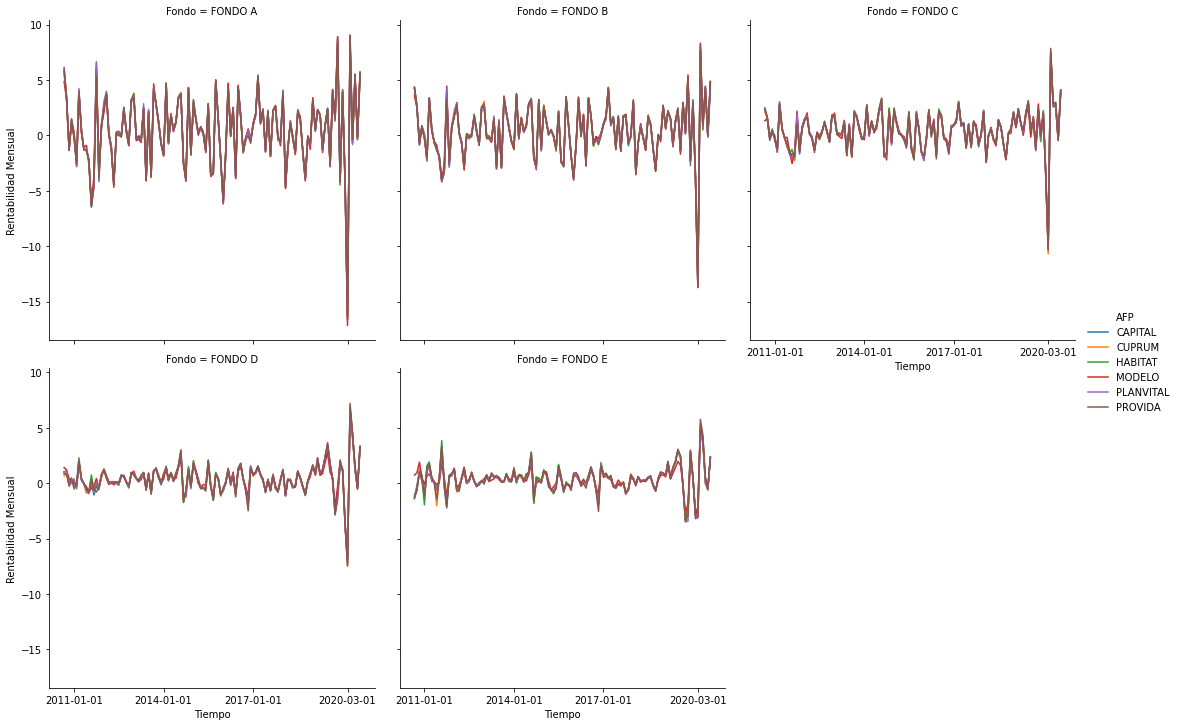

In [121]:
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']


df_rentabilidad_fecha = pd.DataFrame(columns = ['Año','Periodo', 'AFP','Fondo' ,'Rentabilidad Mensual','Fecha'])

for x in FONDOS:
    for i in AFPS:
        df_rentabilidad_f = df_rentabilidad.loc[(df_rentabilidad['AFP'] == i) & (df_rentabilidad['Fondo'] == x)]
        df_rentabilidad_f = df_rentabilidad_f.reset_index()
        df_rentabilidad_f['Fecha'] = fechas_df['Fecha']
        df_rentabilidad_fecha = df_rentabilidad_fecha.append(df_rentabilidad_f, ignore_index=True)

df_rentabilidad_fecha.drop(columns = 'index',inplace = True)

#df_rentabilidad_fecha['Rentabilidad Mensual'] = df_rentabilidad_fecha['Rentabilidad Mensual'].apply(lambda x : float(x)*100)
g = sns.FacetGrid(df_rentabilidad_fecha, col="Fondo", height=5, col_wrap=3) #size = (10,10))
g.map_dataframe(sns.lineplot, x="Fecha", y="Rentabilidad Mensual", hue = 'AFP')
g.set_axis_labels("Tiempo", 'Rentabilidad Mensual')
g.set(xticks=[date(2011, 1, 1), date(2014, 1, 1), date(2017, 1, 1), date(2020, 3, 1)])
g.add_legend()
sns.despine(left = False, bottom=False)

Text(0.5, 1.0, 'Rentabilidad Mensual del Fondo C durante los ultimos 10 años')

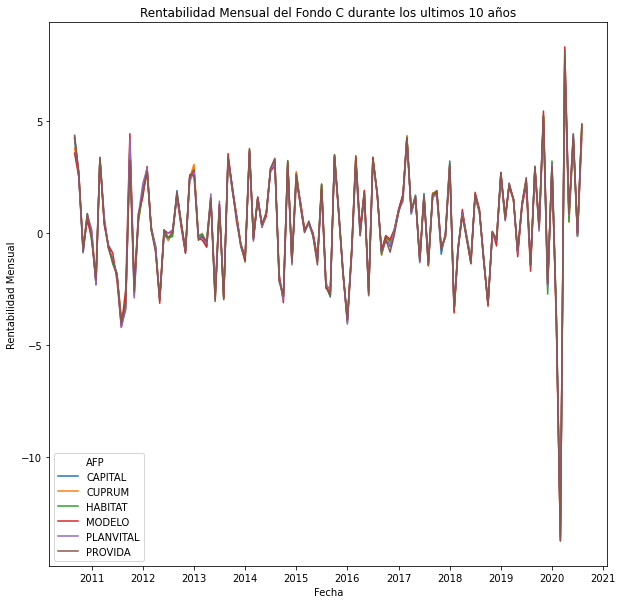

In [124]:
df_rentabilidad_fecha.loc[df_rentabilidad_fecha['Fondo']== 'FONDO C']
plt.figure(figsize = (10,10))
sns.lineplot(data = df_rentabilidad_fecha.loc[df_rentabilidad_fecha['Fondo']== 'FONDO B'], x="Fecha", y="Rentabilidad Mensual", hue = 'AFP')
plt.title('Rentabilidad Mensual del Fondo C durante los ultimos 10 años')


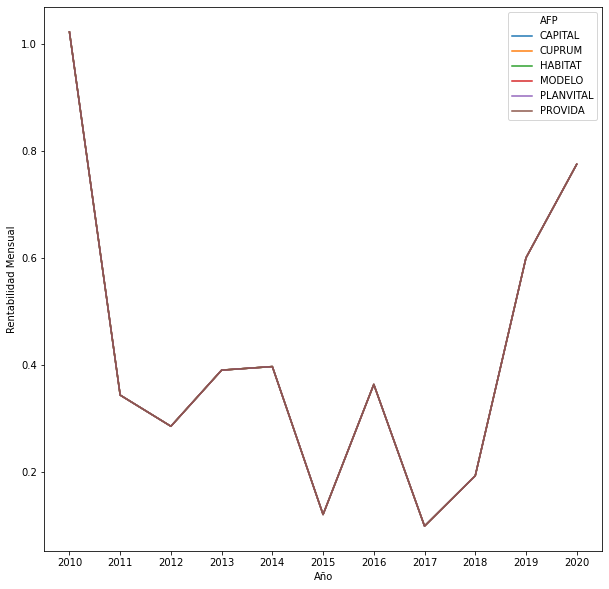

In [374]:
df_rentabilidad

df_rentabilidad_anual = pd.DataFrame(columns = ['Año','Rentabilidad Mensual','AFP','Fondo'])

AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']

FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']

for x in FONDOS: 
    for i in AFPS:
       df_rentabilidad_anual_afp = df_rentabilidad.loc[(df_rentabilidad['AFP'] == 'MODELO') & (df_rentabilidad['Fondo'] == 'FONDO E') ].groupby('Año').mean().reset_index()
       df_rentabilidad_anual_afp['AFP'] = i
       df_rentabilidad_anual_afp['Fondo'] = x
       df_rentabilidad_anual = df_rentabilidad_anual.append(df_rentabilidad_anual_afp, ignore_index=True)


df_rentabilidad_anual

plt.figure(figsize =(10,10))
sns.lineplot(x="Año", y="Rentabilidad Mensual", hue = 'AFP', data = df_rentabilidad_anual.loc[df_rentabilidad_anual['Fondo']== 'FONDO A'])



# **Comision por las  AFPs**

In [125]:
from google.colab import files
uploaded = files.upload()

Saving COMISION.csv to COMISION.csv


In [128]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['COMISION.csv']), encoding='ISO-8859-1', sep = ';')
df2.head()

,Fecha,Año,Periodo,Comision,AFP
0,31-10-2010,2010,10,1.44,CAPITAL
1,30-11-2010,2010,11,1.44,CAPITAL
2,31-12-2010,2010,12,1.44,CAPITAL
3,31-01-2011,2011,1,1.44,CAPITAL
4,28-02-2011,2011,2,1.44,CAPITAL


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     720 non-null    object 
 1   Año       720 non-null    int64  
 2   Periodo   720 non-null    int64  
 3   Comision  720 non-null    float64
 4   AFP       720 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


(0.0, 2.7)

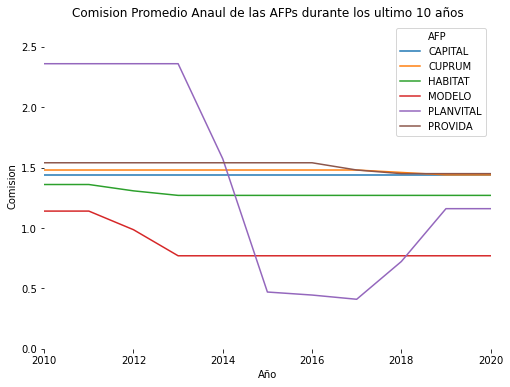

In [175]:
#g = sns.FacetGrid(df2, col="AFP", height=5, col_wrap=3) #size = (10,10))
df2_anual = pd.DataFrame(columns = ['Año','Comision','AFP'])

AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']



for i in AFPS:
       df2_comision = df2.loc[df2['AFP'] == i].groupby('Año').mean()['Comision'].reset_index()
       df2_comision['AFP'] = i
       df2_anual = df2_anual.append(df2_comision, ignore_index=True)

plt.figure(figsize = (8,6))
sns.lineplot(x="Año", y="Comision", hue = 'AFP', data = df2_anual)
sns.despine(left = True, bottom=True)
plt.title('Comision Promedio Anaul de las AFPs durante los ultimo 10 años')
plt.xlim(2010,2020)
plt.ylim(0,2.7)

# **Metodologia de Calculo**

In [384]:
UF_2010_31_01 = 21394.11
Salario = 1000000
Salario_UF = Salario/UF_2010_31_01
#Salario_UF = 1000000
Monto_cotizar = Salario_UF*0.1

In [258]:
df = df_rentabilidad.loc[(df_rentabilidad['AFP'] == 'CAPITAL') & (df_rentabilidad['Fondo'] == 'FONDO A')]
df

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual
0,2010,09,CAPITAL,FONDO A,5.76
35,2010,10,CAPITAL,FONDO A,3.22
70,2010,11,CAPITAL,FONDO A,-1.38
105,2010,12,CAPITAL,FONDO A,1.29
140,2011,01,CAPITAL,FONDO A,0.07
...,...,...,...,...,...
240,2020,04,CAPITAL,FONDO A,8.55
280,2020,05,CAPITAL,FONDO A,-0.66
320,2020,06,CAPITAL,FONDO A,5.34
360,2020,07,CAPITAL,FONDO A,-0.15


In [419]:
def afps(afp,Fondo):
    
    fondo = pd.DataFrame(columns = ['Año','Periodo', 'AFP','Fondo' ,'Monto Inicial', 'Comisiones Cobradas', 'Comision Mes', 'Interes Ganados', 'Monto Final'])
    fondo['Año'] = fechas_df['Año']
    fondo['Periodo'] = fechas_df['mes']
    fondo['AFP'] = afp
    fondo['Fondo'] = Fondo
    

    df = df_rentabilidad.loc[(df_rentabilidad['AFP'] == afp ) & (df_rentabilidad['Fondo'] == Fondo)]
    df = df.reset_index()
    df = pd.concat([df['Rentabilidad Mensual'], fondo], axis=1, sort = False)
    
    df_comision_f = df2.loc[df2['AFP'] == afp]
    df_comision_f = df_comision_f.reset_index()
    df_comision_f = df_comision_f.iloc[:,:]

    df = pd.concat([df_comision_f['Comision'], df], axis=1, sort=False)
  

    df = df[['Año','Periodo','AFP','Fondo','Rentabilidad Mensual','Comision','Monto Inicial', 'Comision Mes', 'Interes Ganados', 'Monto Final']]
    
    df['Rentabilidad Mensual'] = df['Rentabilidad Mensual']/100
    df['Comision'] = df['Comision']/100

    for i in range(120):
        if i == 0:
            df.iloc[i,6] = Monto_cotizar + Salario_UF*df.iloc[i,5]
            df.iloc[i,7] = Salario_UF*df.iloc[i,5]
            df.iloc[i,8] = Monto_cotizar * df.iloc[i,4]
            df.iloc[i,9] = df.iloc[i,6] - df.iloc[i,7] +df.iloc[i,8]
 
        #elif i == 1:
        #    df.iloc[i,6] = Monto_cotizar
        #    df.iloc[i,7] = df.iloc[i,6]* df.iloc[i,4]
        #    df.iloc[i,8] = df.iloc[i,6] + df.iloc[i,7] - Salario_UF *0.1 * df.iloc[i-1,5]

        else:
            df.iloc[i,6] = df.iloc[i-1,9] + Monto_cotizar + Salario_UF*df.iloc[i,5]
            df.iloc[i,7] = df.iloc[i-1,7] + Salario_UF*df.iloc[i,5]
            df.iloc[i,8] = (df.iloc[i-1,9] + Monto_cotizar) *  (df.iloc[i,4])  
            df.iloc[i,9] = df.iloc[i,6] - df.iloc[i,7] +df.iloc[i,8]
    return df

In [420]:
afps('CAPITAL','FONDO A')

,Año,Periodo,AFP,Fondo,Rentabilidad Mensual,Comision,Monto Inicial,Comision Mes,Interes Ganados,Monto Final
0,2010,09,CAPITAL,FONDO A,0.0576,0.0144,5.34727,0.673082,0.269233,4.94342
1,2010,10,CAPITAL,FONDO A,0.0322,0.0144,10.2907,1.34616,0.309687,9.2542
2,2010,11,CAPITAL,FONDO A,-0.0138,0.0144,14.6015,2.01925,-0.192212,12.39
3,2010,12,CAPITAL,FONDO A,0.0129,0.0144,17.7373,2.69233,0.220128,15.2651
4,2011,01,CAPITAL,FONDO A,0.0007,0.0144,20.6123,3.36541,0.0139575,17.2609
...,...,...,...,...,...,...,...,...,...,...
115,2020,04,CAPITAL,FONDO A,0.0855,0.0144,-3857.73,78.0776,-329.894,-4265.7
116,2020,05,CAPITAL,FONDO A,-0.0066,0.0144,-4260.36,78.7506,28.1228,-4310.98
117,2020,06,CAPITAL,FONDO A,0.0534,0.0144,-4305.64,79.4237,-229.957,-4615.02
118,2020,07,CAPITAL,FONDO A,-0.0015,0.0144,-4609.67,80.0968,6.91552,-4682.85


In [340]:
FONDOS = ['FONDO A', 'FONDO B', 'FONDO C', 'FONDO D', 'FONDO E']
AFPS = ['CAPITAL', 'CUPRUM', 'HABITAT', 'MODELO', 'PLANVITAL', 'PROVIDA']

result = pd.DataFrame(columns = ['Año','Periodo', 'AFP','Fondo' ,'Monto Inicial', 'Interes Ganados', 'Monto Final'])

for i in FONDOS:
    for x in AFPS:
        resultados = afps(x,i)
        resultados['Fecha'] = fechas_df['Fecha']
        result = result.append(resultados, ignore_index=True)
result

,Año,Periodo,AFP,Fondo,Monto Inicial,Interes Ganados,Monto Final,Rentabilidad Mensual,Comision,Fecha
0,2010,09,CAPITAL,FONDO A,0,0,0,0.0576,0.0144,2010-09-01
1,2010,10,CAPITAL,FONDO A,4.67418,0.150509,4.75738,0.0322,0.0144,2010-10-01
2,2010,11,CAPITAL,FONDO A,9.43157,-0.130156,9.2341,-0.0138,0.0144,2010-11-01
3,2010,12,CAPITAL,FONDO A,13.9083,0.179417,14.0204,0.0129,0.0144,2010-12-01
4,2011,01,CAPITAL,FONDO A,18.6946,0.0130862,18.6404,0.0007,0.0144,2011-01-01
...,...,...,...,...,...,...,...,...,...,...
3595,2020,04,PROVIDA,FONDO E,598.516,34.4745,632.923,0.0576,0.0145,2020-04-01
3596,2020,05,PROVIDA,FONDO E,637.597,27.9267,665.456,0.0438,0.0145,2020-05-01
3597,2020,06,PROVIDA,FONDO E,670.13,3.75273,673.815,0.0056,0.0145,2020-06-01
3598,2020,07,PROVIDA,FONDO E,678.489,-3.0532,675.368,-0.0045,0.0145,2020-07-01


In [395]:
result.loc[(result['AFP'] == 'CAPITAL') & (result['Fondo'] == 'FONDO A')].head(20)

,Año,Periodo,AFP,Fondo,Monto Inicial,Interes Ganados,Monto Final,Rentabilidad Mensual,Comision,Fecha
0,2010,09,CAPITAL,FONDO A,0,0,0.000000,0.0576,0.0144,2010-09-01
1,2010,10,CAPITAL,FONDO A,4.67418,0.150509,4.757384,0.0322,0.0144,2010-10-01
2,2010,11,CAPITAL,FONDO A,9.43157,-0.130156,9.234104,-0.0138,0.0144,2010-11-01
3,2010,12,CAPITAL,FONDO A,13.9083,0.179417,14.020396,0.0129,0.0144,2010-12-01
4,2011,01,CAPITAL,FONDO A,18.6946,0.0130862,18.640358,0.0007,0.0144,2011-01-01
5,2011,02,CAPITAL,FONDO A,23.3145,-0.648144,22.599089,-0.0278,0.0144,2011-02-01
6,2011,03,CAPITAL,FONDO A,27.2733,1.04184,28.247804,0.0382,0.0144,2011-03-01
7,2011,04,CAPITAL,FONDO A,32.922,0.151441,33.006120,0.0046,0.0144,2011-04-01
8,2011,05,CAPITAL,FONDO A,37.6803,-0.474772,37.138224,-0.0126,0.0144,2011-05-01
9,2011,06,CAPITAL,FONDO A,41.8124,-0.556105,41.188994,-0.0133,0.0144,2011-06-01


**RESULTADOS FONDO A**



In [341]:
#FONDO A
print('Monto Final ahorrado por cada AFP en el Fondo A')
result.loc[(result['Fondo'] == 'FONDO A') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Monto Final']].sort_values('Monto Final', ascending = False)

Monto Final ahorrado por cada AFP en el Fondo A


,AFP,Monto Final
719,PROVIDA,716.474
359,HABITAT,713.971
479,MODELO,709.171
119,CAPITAL,707.24
239,CUPRUM,705.386
599,PLANVITAL,696.031


**RESULTADOS FONDO B**


In [342]:
#FONDO B
print('Monto Final ahorrado por cada AFP en el Fondo B')
result.loc[(result['Fondo'] == 'FONDO B') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Monto Final']].sort_values('Monto Final', ascending = False)


Monto Final ahorrado por cada AFP en el Fondo B


,AFP,Monto Final
1079,HABITAT,715.13
1199,MODELO,708.874
1439,PROVIDA,705.296
839,CAPITAL,704.474
959,CUPRUM,697.182
1319,PLANVITAL,688.618


**RESULTADOS FONDO C**


In [343]:
#fondo C
print('Monto Final ahorrado por cada AFP en el Fondo C')
result.loc[(result['Fondo'] == 'FONDO C') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Monto Final']].sort_values('Monto Final', ascending = False)

Monto Final ahorrado por cada AFP en el Fondo C


,AFP,Monto Final
1799,HABITAT,737.203
1559,CAPITAL,725.46
2159,PROVIDA,719.964
1919,MODELO,717.974
1679,CUPRUM,714.756
2039,PLANVITAL,704.309


**RESULTADOS FONDO D**

In [344]:
#Fondo D
print('Monto Final ahorrado por cada AFP en el Fondo D')
result.loc[(result['Fondo'] == 'FONDO D') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Monto Final']].sort_values('Monto Final', ascending = False)

Monto Final ahorrado por cada AFP en el Fondo D


,AFP,Monto Final
2519,HABITAT,725.195
2639,MODELO,715.555
2279,CAPITAL,713.817
2879,PROVIDA,712.492
2399,CUPRUM,710.083
2759,PLANVITAL,695.555


**RESULTADOS FONDO E**


In [345]:
#Fondo E
print('Monto Final ahorrado por cada AFP en el Fondo E')
result.loc[(result['Fondo'] == 'FONDO E') & (result['Año']== 2020) & (result['Periodo']== '08')][['AFP','Monto Final']].sort_values('Monto Final', ascending = False)

Monto Final ahorrado por cada AFP en el Fondo E


,AFP,Monto Final
3239,HABITAT,707.096
2999,CAPITAL,700.739
3599,PROVIDA,696.092
3119,CUPRUM,691.937
3359,MODELO,687.956
3479,PLANVITAL,675.907


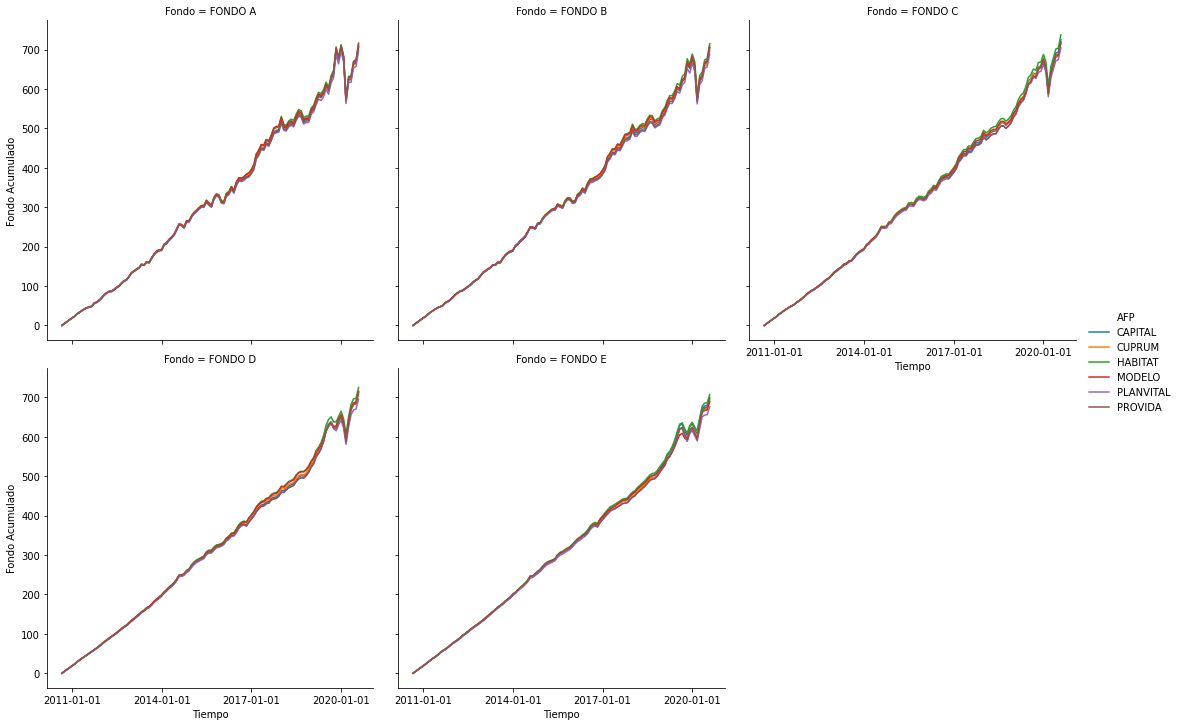

In [346]:
sns.set_color_codes("muted")
result['Monto Final'] = result['Monto Final'].apply(lambda x : float(x))
g = sns.FacetGrid(result, col="Fondo", height=5, col_wrap=3) #size = (10,10))
g.map_dataframe(sns.lineplot, x="Fecha", y="Monto Final", hue = 'AFP')
g.set_axis_labels("Tiempo", "Fondo Acumulado")
g.set(xticks=[date(2011, 1, 1), date(2014, 1, 1), date(2017, 1, 1), date(2020, 1, 1)])
g.add_legend()
sns.despine(left = False, bottom=False)